## Practical Exercises - Part 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Reading the dataset

In [2]:
url = 'https://www.famaf.unc.edu.ar/~nocampo043/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df["tools_programming_languages"].iloc[6092]

'None of the previous one'

In [4]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,salary_has_bonus,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies
0,Female,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,University,Ongoing,...,No,No,0.0,0,In my current job,NaN,501-1000,Services / Software Consulting / Digital,7,2
1,Male,29,Argentina,Corrientes,5.0,2.0,2.0,4,University,Ongoing,...,Less than a salary,One,10.0,1,Never,No,201-500,Other industries,8,9
2,Female,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secondary,Complete,...,One salary,No,0.0,0,In a previous job,No,2001-5000,Other industries,6,9


# Exercise 1 - Descriptive analysis

Answer the question: **What programming languages are ​​associated with the best salaries?**

For it:
1. Select the relevant columns to analyze.
2. Select the relevant rows to analyze. This includes removing extreme and erroneous values, but you can also focus the analysis on a sub-population. For example, they can be limited to people with a salary greater than 10,000 pesos or people who work only in "Data Science", but you must justify your choice and reformulate the initial question if necessary.
  * Get a list of the most popular programming languages. Then, decide how many and which ones to select to include in the analysis.
  * For each of the columns from the previous point, choose the ranges or values ​​selected to include in the analysis.
3. Select metrics that help answer the question and methods to analyze them. Choose ONE of the following options:
  * Compare salary distributions for each language using visualizations. As the visualization is the final product, it must be clear and show relevant information.
  * Compare measures of descriptive statistics on salary distribution for each language. Be creative. Descriptive statistics allow us to say things like: "Kotlin programmers mostly earn the top 10% of salaries!" (where *majority* is a slippery middle ground that just means more than 50%). To compare multiple languages, we recommend using visualizations as well.
  * Compare odds. For example: "If you know Python or Java, you have a 30% more chance of winning over 100K".

If you consider it necessary, carry out several iterations. That is, if they find that the distributions of the programming languages ​​they initially selected are not very different, they can redo the analysis using only the programming languages ​​that are different.

In [5]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages',
                    'salary_monthly_NET',
                    'work_contract_type',
                    'tools_platform',
                    'profile_studies_level']

### Frequency count of programming languages

The column that contains information about the programming languages used is `tools_programming_languages`. Its values are strings with the selected languages separated by commas.

In [6]:
df.tools_programming_languages[:3]

0                        None
1    HTML, Javascript, Python
2                        None
Name: tools_programming_languages, dtype: object

The following code cells separate these programming languages and count how often they appear.

It is not necessary to understand this code in depth, although it is a good exercise.

In [7]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'None of the previous one' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('none of the previous one', '') \
    .replace('none', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NET,work_contract_type,tools_platform,profile_studies_level,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,Full-Time,"Docker, Google Cloud Platform/App Engine",University,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,"Docker, Google Cloud Platform/App Engine",University,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,"Docker, Google Cloud Platform/App Engine",University,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"Docker, Linux, OpenStack, VMWare, Windows Server",Postgraduate,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"Docker, Linux, OpenStack, VMWare, Windows Server",Postgraduate,"[bash/shell, c, css, html, java, javascript, p..."


In the `programming_language` column, you will find each language separately. Note that if a response contained 3 languages, such as `"HTML, Javascript, Python"`, the row has been replicated 3 times. Therefore, there are three rows with index 1.

In [8]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


## Relevant language filtering

The following code allows you to select only the rows where the value of the `programming_language` column is found in the `interesting_languages` list.

In [9]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python", "javascript"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang

,programming_language,tools_programming_languages,salary_monthly_NET,work_contract_type,tools_platform,profile_studies_level,cured_programming_languages
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,"Docker, Google Cloud Platform/App Engine",University,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,"Docker, Google Cloud Platform/App Engine",University,"[html, javascript, python]"
3,javascript,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"Docker, Linux, OpenStack, VMWare, Windows Server",Postgraduate,"[bash/shell, c, css, html, java, javascript, p..."
3,python,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"Docker, Linux, OpenStack, VMWare, Windows Server",Postgraduate,"[bash/shell, c, css, html, java, javascript, p..."
4,javascript,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Full-Time,Amazon Web Services,University,"[css, html, javascript, sql, typescript]"
...,...,...,...,...,...,...,...
6087,python,Python,120000.0,Full-Time,"*BSD, HP-UX, Linux, Solaris",University,[python]
6089,python,"Bash/Shell, Python, SQL",130000.0,Full-Time,"Linux, Windows Server",University,"[bash/shell, python, sql]"
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,Full-Time,"Docker, Google Cloud Platform/App Engine, Linu...",Terciary,"[.net, c#, cobol, css, html, javascript, php, ..."
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Full-Time,"Amazon Web Services, Docker, Kubernetes, Linux",Terciary,"[c, c++, html, java, javascript, php, python, ..."


In [ ]:
df_lang

,programming_language,tools_programming_languages,salary_monthly_NET,work_contract_type,tools_platform,profile_studies_level,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,Full-Time,"Docker, Google Cloud Platform/App Engine",University,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,"Docker, Google Cloud Platform/App Engine",University,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,"Docker, Google Cloud Platform/App Engine",University,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"Docker, Linux, OpenStack, VMWare, Windows Server",Postgraduate,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"Docker, Linux, OpenStack, VMWare, Windows Server",Postgraduate,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...,...,...,...
6093,java,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Full-Time,"Amazon Web Services, Docker, Kubernetes, Linux",Terciary,"[c, c++, html, java, javascript, php, python, ..."
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Full-Time,"Amazon Web Services, Docker, Kubernetes, Linux",Terciary,"[c, c++, html, java, javascript, php, python, ..."
6093,php,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Full-Time,"Amazon Web Services, Docker, Kubernetes, Linux",Terciary,"[c, c++, html, java, javascript, php, python, ..."
6093,python,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Full-Time,"Amazon Web Services, Docker, Kubernetes, Linux",Terciary,"[c, c++, html, java, javascript, php, python, ..."


In [ ]:
# Filter the dataframe:
# - Remove the outliers with interquartile range or with standard deviation
# - Filtering by full-time jobs

In [10]:
remove_outliers = numpy.abs(
    df_lang["salary_monthly_NET"] - df_lang["salary_monthly_NET"].mean()
) <= (2.5 * df_lang["salary_monthly_NET"].std())

df_filtered = df_lang[(df_lang["work_contract_type"].isin(["Full-Time", "Part-Time"])) &
                      remove_outliers]

In [11]:
df_filtered

,programming_language,tools_programming_languages,salary_monthly_NET,work_contract_type,tools_platform,profile_studies_level,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,Full-Time,"Docker, Google Cloud Platform/App Engine",University,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,"Docker, Google Cloud Platform/App Engine",University,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,"Docker, Google Cloud Platform/App Engine",University,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"Docker, Linux, OpenStack, VMWare, Windows Server",Postgraduate,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,"Docker, Linux, OpenStack, VMWare, Windows Server",Postgraduate,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...,...,...,...
6093,java,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Full-Time,"Amazon Web Services, Docker, Kubernetes, Linux",Terciary,"[c, c++, html, java, javascript, php, python, ..."
6093,javascript,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Full-Time,"Amazon Web Services, Docker, Kubernetes, Linux",Terciary,"[c, c++, html, java, javascript, php, python, ..."
6093,php,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Full-Time,"Amazon Web Services, Docker, Kubernetes, Linux",Terciary,"[c, c++, html, java, javascript, php, python, ..."
6093,python,"C, C++, HTML, Java, Javascript, PHP, Python, SQL",72.0,Full-Time,"Amazon Web Services, Docker, Kubernetes, Linux",Terciary,"[c, c++, html, java, javascript, php, python, ..."


In [12]:
df_lang_counts = df_filtered["programming_language"].value_counts()

In [13]:
df_lang_counts

javascript    2119
sql           1883
html          1585
java          1300
python        1275
              ... 
soy              1
recruiter        1
asp              1
kdb              1
infobasic        1
Name: programming_language, Length: 195, dtype: int64

In [14]:
df_lang_counts.sort_values(ascending=False).head(5)

javascript    2119
sql           1883
html          1585
java          1300
python        1275
Name: programming_language, dtype: int64

In [15]:
df_top5_langs = (
    df_lang_counts
      .sort_values(ascending=False)
      .head(5)
      .reset_index()
      .rename(columns={"index": "top5", "programming_language": "frequency"})
)

In [16]:
df_top5_langs["frequency"].sum()

8162

In [ ]:
df_top5_langs["top5"]

0    javascript
1           sql
2          html
3          java
4        python
Name: top5, dtype: object

In [ ]:
df_filtered = df_filtered[df_filtered.programming_language.isin(df_top5_langs["top5"])]

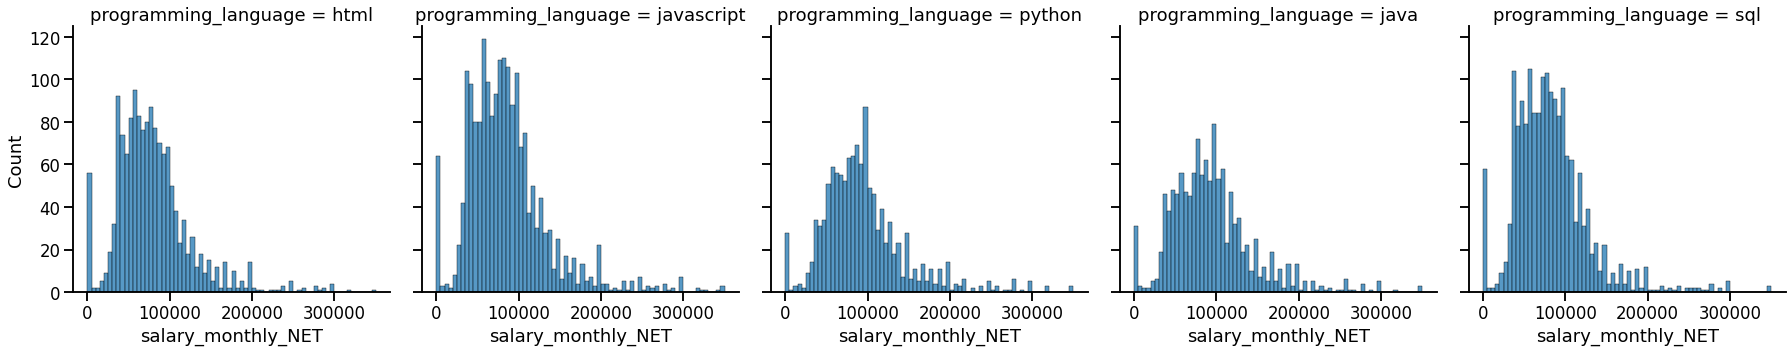

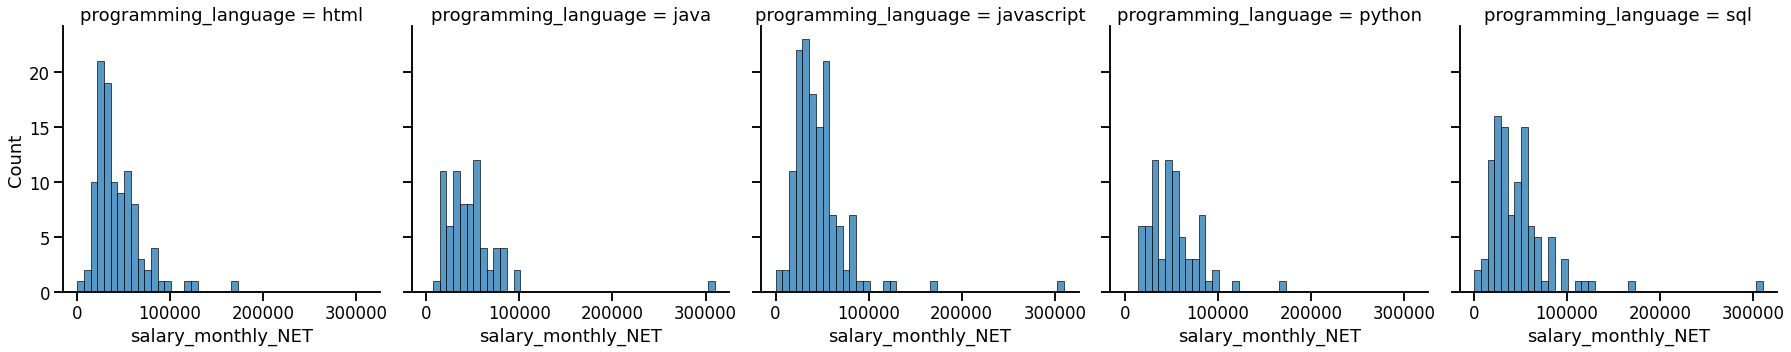

In [ ]:
for wtype in df_filtered["work_contract_type"].unique():
    seaborn.displot(data=df_filtered[df_filtered["work_contract_type"] == wtype].reset_index(),
                    x="salary_monthly_NET",
                    col="programming_language")
    plt.ticklabel_format(style='plain', axis='x')

# Exercise 2 - Densities and various variables

Answer the general question: **What tools (practical and theoretical) are useful to explore the base, discover patterns, associations?**

To do this, consider (same as the previous exercise):
1. Select the relevant columns to analyze.
2. Select the relevant rows to analyze. This includes removing extreme and erroneous values but can also focus the analysis on sub-populations.

## a) Joint density

What visual tools and models can you use to study the distribution and behavior of your data?

Choose three numeric variables and 2 categorical variables. Visualize the base according to several of the chosen variables. Can you describe in some way the behavior of your data? What tools would you use? describe

In [ ]:
numerical_variables = ["salary_monthly_NET", "profile_years_experience", "work_people_in_charge_of"]
categorical_variables = ["profile_gender", "salary_in_usd"]

In [ ]:
df["profile_gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
df["work_people_in_charge_of"].unique()

array([   0,    4,    5,    3,   14,   38,    7,   16,    2,   24,    1,
          9,   20,   10,   40,   17,    6,   15,   30,    8,   25,   50,
         27,   12,   18,   11,   22,   60,   13,  300,  110,   45,   35,
        120,   76,  100,   90,   19,   21,   23,  170,  138,   28,  150,
         55,   36,   31,   59,   70, 2500,   80])

In [ ]:
df["work_people_in_charge_of"].mean()

2.2116488925348645

In [ ]:
df["work_people_in_charge_of"].median()

0.0

In [ ]:
df["work_people_in_charge_of"].std()

32.98339472655397

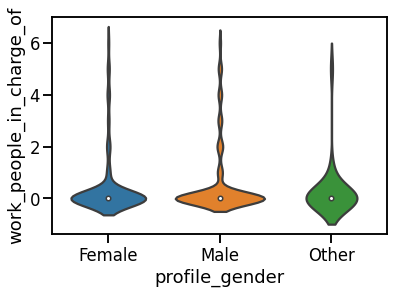

In [ ]:

remove_outliers = numpy.abs(
    df["work_people_in_charge_of"] - df["work_people_in_charge_of"].mean()
) <= (1.5 * df["work_people_in_charge_of"].std())

seaborn.violinplot(
    x="profile_gender",
    y="work_people_in_charge_of",
    data=df[remove_outliers &
            (df["work_people_in_charge_of"] <= 6)])

In [ ]:
df["profile_gender"].value_counts()

Male      5122
Female     942
Other       31
Name: profile_gender, dtype: int64

## b) Association

* We need to decide whether or not to remove the gross salary column. To make the survey simpler.
Is there a correlation between gross and net salary? What approach and measures would you use?

## c) Conditional density

Study the salary distribution according to the level of study.

Separate the population according to the level of education (choose two significant subpopulations) and graph both histograms of the variable `'salary_monthly_NET'` comparatively.
Do you consider that both variables are independent?
What would you analyze about it?

Compute measures of centralization and dispersion for each subpopulation

## d) Conditional Joint Density

Choose two numeric variables and one categorical.
Study the dispersion (scatterplot) of the two variables discriminating in color by the categorical variable.